In [64]:
from OpenSSL import crypto
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import os
import time

In [65]:
def normalise_counter(ctr):
    total = sum(ctr.values())
    for key in ctr.keys():
        ctr[key] /=total
    return ctr

In [66]:
phish_df = pd.read_csv('final_certificate_datasets/phish_dataset.csv')
benign_df = pd.read_csv('final_certificate_datasets/benign_certs.csv')
benign_df.drop_duplicates(subset=['CN'],inplace=True)
phish_df2 = pd.read_csv('final_certificate_datasets/phish_harsh_subset.csv')
phish_df3 =  pd.read_csv('final_certificate_datasets/phish_dataset_urls.csv')
benign_df2 = pd.read_csv('final_certificate_datasets/benign_unpopular.csv')
benign_df2.drop_duplicates(subset=['CN'],inplace=True)
benign_df2['verCode'] = benign_df2['verCode'].astype(str)
#benign_df3 = benign_df[:500]
all_dfs = [phish_df,phish_df2,phish_df3,benign_df,benign_df2]
labels = ['phish','phish subset','phish all urls','benign','benign unpopular']

In [67]:
def experiment(df,valid_only=True):

    if valid_only:
        df = df.loc[df['verCode'].astype(str)=='0']
        #df = df.loc[]
    ctr = Counter(df['issuer_CN'])

    return ctr#normalise_counter(ctr)
    

In [124]:
ctrs = []
for z,df in enumerate(all_dfs):
    print()
    print(labels[z])
    c = experiment(df)
    ctrs.append(c)


phish

phish subset

phish all urls

benign

benign unpopular


In [110]:
keys = []
for k in ctrs[3].most_common(30):
    keys.append(k[0])

In [111]:
new_df = pd.DataFrame()
for k in keys:
    new_df[k] = [c[k] for c in ctrs]

In [112]:
new_df

,R3,Amazon,Sectigo RSA Domain Validation Secure Server CA,Go Daddy Secure Certificate Authority - G2,DigiCert SHA2 Secure Server CA,Cloudflare Inc ECC CA-3,DigiCert TLS RSA SHA256 2020 CA1,"cPanel, Inc. Certification Authority",GeoTrust RSA CA 2018,Sectigo RSA Organization Validation Secure Server CA,...,AlphaSSL CA - SHA256 - G2,Starfield Secure Certificate Authority - G2,Encryption Everywhere DV TLS CA - G1,GlobalSign Atlas R3 DV TLS CA 2020,DFN-Verein Global Issuing CA,Gandi Standard SSL CA 2,Sectigo RSA Extended Validation Secure Server CA,TERENA SSL CA 3,GlobalSign GCC R3 DV TLS CA 2020,GeoTrust TLS DV RSA Mixed SHA256 2020 CA-1
0,2355,77,484,77,18,25,17,1086,11,10,...,17,21,30,3,1,6,2,0,10,18
1,1020,11,91,14,1,2,1,311,1,2,...,2,2,7,0,0,2,0,0,2,13
2,3425,258,1813,129,160,975,38,1504,21,27,...,46,135,44,3,1,6,2,0,28,21
3,8876,2418,2240,1551,1126,862,640,614,561,499,...,213,202,174,149,145,133,126,126,120,106
4,5236,318,817,447,108,134,53,686,77,86,...,77,144,137,8,14,26,27,14,39,38


In [128]:
new_df = pd.DataFrame()
for i,c in enumerate(ctrs):
    new_df[labels[i]] = [np.log(normalise_counter(c)[k]/normalise_counter(ctrs[3])[k]) if normalise_counter(ctrs[3])[k] > 0 else 999 for k in keys]
new_df['Issuer CN'] = keys
new_df.set_index('Issuer CN',inplace=True)

/Users/krzysiek/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [129]:
new_df

,phish,phish subset,phish all urls,benign,benign unpopular
Issuer CN,,,,,
R3,0.460223,0.715051,-0.201208,0.0,0.526342
Amazon,-1.659857,-2.514202,-1.486695,0.0,-0.974510
Sectigo RSA Domain Validation Secure Server CA,0.254888,-0.324773,0.539549,0.0,0.045543
Go Daddy Secure Certificate Authority - G2,-1.215816,-1.828999,-1.735801,0.0,-0.189962
DigiCert SHA2 Secure Server CA,-2.349021,-4.147828,-1.200211,0.0,-1.290161
Cloudflare Inc ECC CA-3,-1.753346,-3.187509,0.874224,0.0,-0.807281
DigiCert TLS RSA SHA256 2020 CA1,-1.841221,-3.582869,-2.072840,0.0,-1.437041
"cPanel, Inc. Certification Authority",2.357295,2.198397,1.646930,0.0,1.165017
GeoTrust RSA CA 2018,-2.144792,-3.451122,-2.534157,0.0,-0.931781


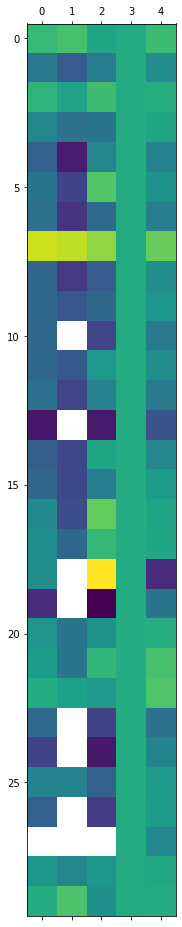

In [130]:
plt.matshow(new_df)

In [145]:
new_df = pd.DataFrame()
for i,c in enumerate(ctrs):
    new_df[labels[i]] = ['{0:10.1f}%'.format(normalise_counter(c)[k]*100) for k in keys]
new_df['Issuer CN'] = keys
new_df.set_index('Issuer CN',inplace=True)
new_df

,phish,phish subset,phish all urls,benign,benign unpopular
Issuer CN,,,,,
R3,52.0%,67.1%,26.9%,32.8%,55.6%
Amazon,1.7%,0.7%,2.0%,8.9%,3.4%
Sectigo RSA Domain Validation Secure Server CA,10.7%,6.0%,14.2%,8.3%,8.7%
Go Daddy Secure Certificate Authority - G2,1.7%,0.9%,1.0%,5.7%,4.7%
DigiCert SHA2 Secure Server CA,0.4%,0.1%,1.3%,4.2%,1.1%
Cloudflare Inc ECC CA-3,0.6%,0.1%,7.6%,3.2%,1.4%
DigiCert TLS RSA SHA256 2020 CA1,0.4%,0.1%,0.3%,2.4%,0.6%
"cPanel, Inc. Certification Authority",24.0%,20.5%,11.8%,2.3%,7.3%
GeoTrust RSA CA 2018,0.2%,0.1%,0.2%,2.1%,0.8%


In [160]:
new_df = pd.DataFrame()
for i,c in enumerate(ctrs):
    new_df[labels[i]] = [normalise_counter(c)[k] for k in keys]
new_df['Issuer CN'] = keys
new_df.set_index('Issuer CN',inplace=True)
new_df

,phish,phish subset,phish all urls,benign,benign unpopular
Issuer CN,,,,,
R3,0.520442,0.671494,0.268606,0.328473,0.556016
Amazon,0.017017,0.007242,0.020234,0.089483,0.033769
Sectigo RSA Domain Validation Secure Server CA,0.106961,0.059908,0.142185,0.082895,0.086758
Go Daddy Secure Certificate Authority - G2,0.017017,0.009217,0.010117,0.057398,0.047467
DigiCert SHA2 Secure Server CA,0.003978,0.000658,0.012548,0.041670,0.011469
Cloudflare Inc ECC CA-3,0.005525,0.001317,0.076465,0.031900,0.014230
DigiCert TLS RSA SHA256 2020 CA1,0.003757,0.000658,0.002980,0.023684,0.005628
"cPanel, Inc. Certification Authority",0.240000,0.204740,0.117952,0.022722,0.072847
GeoTrust RSA CA 2018,0.002431,0.000658,0.001647,0.020761,0.008177


In [162]:
import seaborn as sns

cm = sns.light_palette("green", as_cmap=True)
new_df = new_df.round(3)
pd.set_option("precision", 3)
s = new_df.style.background_gradient(cmap=cm)
s

,phish,phish subset,phish all urls,benign,benign unpopular
Issuer CN,,,,,
R3,0.520,0.671,0.269,0.328,0.556
Amazon,0.017,0.007,0.020,0.089,0.034
Sectigo RSA Domain Validation Secure Server CA,0.107,0.060,0.142,0.083,0.087
Go Daddy Secure Certificate Authority - G2,0.017,0.009,0.010,0.057,0.047
DigiCert SHA2 Secure Server CA,0.004,0.001,0.013,0.042,0.011
Cloudflare Inc ECC CA-3,0.006,0.001,0.076,0.032,0.014
DigiCert TLS RSA SHA256 2020 CA1,0.004,0.001,0.003,0.024,0.006
"cPanel, Inc. Certification Authority",0.240,0.205,0.118,0.023,0.073
GeoTrust RSA CA 2018,0.002,0.001,0.002,0.021,0.008


In [153]:
import seaborn as sns

cm = sns.light_palette("green", as_cmap=True)

s = new_df.style.background_gradient(cmap=cm)
s['phish'] = new_df['phish']

TypeError: 'Styler' object does not support item assignment

In [103]:
z = 0
print(labels[z])
ctrs[z].most_common(10)

phish


[('R3', 0.520441988950276),
 ('cPanel, Inc. Certification Authority', 0.23999999999999988),
 ('Sectigo RSA Domain Validation Secure Server CA', 0.10696132596685078),
 ('Go Daddy Secure Certificate Authority - G2', 0.017016574585635352),
 ('Amazon', 0.017016574585635352),
 ('Encryption Everywhere DV TLS CA - G1', 0.006629834254143643),
 ('Cloudflare Inc ECC CA-3', 0.005524861878453037),
 ('ZeroSSL RSA Domain Secure Site CA', 0.005303867403314916),
 ('Starfield Secure Certificate Authority - G2', 0.004640883977900551),
 ('RapidSSL TLS DV RSA Mixed SHA256 2020 CA-1', 0.0044198895027624295)]

In [7]:
z = 1
print(labels[z])
ctrs[z].most_common(10)

phish subset


[('R3', 1020),
 ('cPanel, Inc. Certification Authority', 311),
 ('Sectigo RSA Domain Validation Secure Server CA', 91),
 ('Go Daddy Secure Certificate Authority - G2', 14),
 ('GeoTrust TLS DV RSA Mixed SHA256 2020 CA-1', 13),
 ('Amazon', 11),
 ('Actalis Domain Validation Server CA G3', 9),
 ('Encryption Everywhere DV TLS CA - G1', 7),
 ('ZeroSSL RSA Domain Secure Site CA', 6),
 ('GTS CA 1D2', 4)]

In [8]:
z = 2
print(labels[z])
ctrs[z].most_common(10)

phish all urls


[('R3', 3425),
 ('GTS CA 1O1', 2158),
 ('Sectigo RSA Domain Validation Secure Server CA', 1813),
 ('cPanel, Inc. Certification Authority', 1504),
 ('Cloudflare Inc ECC CA-3', 975),
 ('RapidSSL RSA CA 2018', 469),
 ('DigiCert Cloud Services CA-1', 324),
 ('Amazon', 258),
 ('RapidSSL TLS DV RSA Mixed SHA256 2020 CA-1', 205),
 ('DigiCert SHA2 Secure Server CA', 160)]

In [9]:
z = 3
print(labels[z])
ctrs[z].most_common(10)

benign


[('R3', 8876),
 ('Amazon', 2418),
 ('Sectigo RSA Domain Validation Secure Server CA', 2240),
 ('Go Daddy Secure Certificate Authority - G2', 1551),
 ('DigiCert SHA2 Secure Server CA', 1126),
 ('Cloudflare Inc ECC CA-3', 862),
 ('DigiCert TLS RSA SHA256 2020 CA1', 640),
 ('cPanel, Inc. Certification Authority', 614),
 ('GeoTrust RSA CA 2018', 561),
 ('Sectigo RSA Organization Validation Secure Server CA', 499)]

In [10]:
z = 4
print(labels[z])
ctrs[z].most_common(10)

benign unpopular


[('R3', 5236),
 ('Sectigo RSA Domain Validation Secure Server CA', 817),
 ('cPanel, Inc. Certification Authority', 686),
 ('Go Daddy Secure Certificate Authority - G2', 447),
 ('Amazon', 318),
 ('Starfield Secure Certificate Authority - G2', 144),
 ('Encryption Everywhere DV TLS CA - G1', 137),
 ('Cloudflare Inc ECC CA-3', 134),
 ('DigiCert SHA2 Secure Server CA', 108),
 ('RapidSSL TLS DV RSA Mixed SHA256 2020 CA-1', 88)]

In [11]:
total_df = pd.concat([phish_df,benign_df])

In [12]:
Counter(total_df['issuer_CN']).most_common(20)

[('R3', 11336),
 ('Sectigo RSA Domain Validation Secure Server CA', 2801),
 ('Amazon', 2500),
 ('cPanel, Inc. Certification Authority', 1797),
 ('Go Daddy Secure Certificate Authority - G2', 1699),
 ('DigiCert SHA2 Secure Server CA', 1193),
 ('Cloudflare Inc ECC CA-3', 887),
 ('DigiCert TLS RSA SHA256 2020 CA1', 685),
 ('GeoTrust RSA CA 2018', 588),
 ('Sectigo RSA Organization Validation Secure Server CA', 527),
 ('Entrust Certification Authority - L1K', 515),
 ('GlobalSign RSA OV SSL CA 2018', 487),
 ('DigiCert SHA2 High Assurance Server CA', 431),
 ('InCommon RSA Server CA', 418),
 ('DigiCert SHA2 Extended Validation Server CA', 407),
 ('Thawte RSA CA 2018', 386),
 ('RapidSSL RSA CA 2018', 358),
 ('RapidSSL TLS DV RSA Mixed SHA256 2020 CA-1', 329),
 ('GTS CA 1O1', 260),
 ('GEANT OV RSA CA 4', 249)]

In [13]:
Counter(phish_df['issuer_CN']).most_common(20)


[('R3', 2390),
 ('cPanel, Inc. Certification Authority', 1150),
 ('Sectigo RSA Domain Validation Secure Server CA', 494),
 ('Go Daddy Secure Certificate Authority - G2', 84),
 ('Amazon', 77),
 ("Let's Encrypt Authority X3", 54),
 ('Encryption Everywhere DV TLS CA - G1', 32),
 ('ZeroSSL RSA Domain Secure Site CA', 28),
 ('Cloudflare Inc ECC CA-3', 25),
 ('Starfield Secure Certificate Authority - G2', 23),
 ('RapidSSL RSA CA 2018', 20),
 ('RapidSSL TLS DV RSA Mixed SHA256 2020 CA-1', 20),
 ('Actalis Domain Validation Server CA G3', 19),
 ('DigiCert SHA2 Secure Server CA', 18),
 ('GeoTrust TLS DV RSA Mixed SHA256 2020 CA-1', 18),
 ('AlphaSSL CA - SHA256 - G2', 17),
 ('DigiCert TLS RSA SHA256 2020 CA1', 17),
 ('GTS CA 1O1', 16),
 ('COMODO ECC Domain Validation Secure Server CA 2', 15),
 ('GeoTrust RSA CA 2018', 12)]

In [14]:
Counter(benign_df['issuer_CN']).most_common(20)

[('R3', 8946),
 ('Amazon', 2423),
 ('Sectigo RSA Domain Validation Secure Server CA', 2307),
 ('Go Daddy Secure Certificate Authority - G2', 1615),
 ('DigiCert SHA2 Secure Server CA', 1175),
 ('Cloudflare Inc ECC CA-3', 862),
 ('DigiCert TLS RSA SHA256 2020 CA1', 668),
 ('cPanel, Inc. Certification Authority', 647),
 ('GeoTrust RSA CA 2018', 576),
 ('Sectigo RSA Organization Validation Secure Server CA', 516),
 ('Entrust Certification Authority - L1K', 506),
 ('GlobalSign RSA OV SSL CA 2018', 478),
 ('DigiCert SHA2 High Assurance Server CA', 421),
 ('InCommon RSA Server CA', 417),
 ('DigiCert SHA2 Extended Validation Server CA', 401),
 ('Thawte RSA CA 2018', 379),
 ('RapidSSL RSA CA 2018', 338),
 ('RapidSSL TLS DV RSA Mixed SHA256 2020 CA-1', 309),
 ('GEANT OV RSA CA 4', 248),
 ('GTS CA 1O1', 244)]

In [15]:
ctr = Counter(phish_df['issuer_O'])
for key in ctr.keys():
    ctr[key] /= len(phish_df)
ctr.most_common(20)

[("Let's Encrypt", 0.49304295220810646),
 ('cPanel, Inc.', 0.2321032466223029),
 ('Sectigo Limited', 0.10304496874369833),
 ('DigiCert Inc', 0.03690260133091349),
 (nan, 0.034079451502319016),
 ('GoDaddy.com, Inc.', 0.017140552530752168),
 ('Amazon', 0.015527324057269611),
 ('GlobalSign nv-sa', 0.0102843315184513),
 ('COMODO CA Limited', 0.006049606775559589),
 ('ZeroSSL', 0.0056462996571889496),
 ('Cloudflare, Inc.', 0.00504133897963299),
 ('Google Trust Services', 0.004638031861262351),
 ('Starfield Technologies, Inc.', 0.004638031861262351),
 ('Actalis S.p.A.', 0.004033071183706392),
 ('Microsoft Corporation', 0.0024198427102238356),
 ('TrustAsia Technologies, Inc.', 0.0024198427102238356),
 ('Entrust, Inc.', 0.0018148820326678765),
 ('Unizeto Technologies S.A.', 0.001613228473482557),
 ('Gandi', 0.0014115749142972374),
 ('SomeOrganization', 0.0014115749142972374)]

In [16]:
ctr = Counter(benign_df['issuer_CN'])
for key in ctr.keys():
    ctr[key] /= len(benign_df)
ctr.most_common(20)

[('R3', 0.3187259512612227),
 ('Amazon', 0.08632606527005843),
 ('Sectigo RSA Domain Validation Secure Server CA', 0.08219324497648568),
 ('Go Daddy Secure Certificate Authority - G2', 0.05753883425965512),
 ('DigiCert SHA2 Secure Server CA', 0.041862619352999855),
 ('Cloudflare Inc ECC CA-3', 0.030711130112583727),
 ('DigiCert TLS RSA SHA256 2020 CA1', 0.023799344449194813),
 ('cPanel, Inc. Certification Authority', 0.02305116146501354),
 ('GeoTrust RSA CA 2018', 0.020521590423257803),
 ('Sectigo RSA Organization Validation Secure Server CA', 0.01838392475416845),
 ('Entrust Certification Authority - L1K', 0.018027647142653556),
 ('GlobalSign RSA OV SSL CA 2018', 0.017030069830411856),
 ('DigiCert SHA2 High Assurance Server CA', 0.01499928744477697),
 ('InCommon RSA Server CA', 0.014856776400171013),
 ('DigiCert SHA2 Extended Validation Server CA', 0.014286732221747185),
 ('Thawte RSA CA 2018', 0.013502921476414423),
 ('RapidSSL RSA CA 2018', 0.012042183269203362),
 ('RapidSSL TLS DV 

In [17]:
issuers = benign_df['issuer_O']

In [18]:
b200 = issuers[:200]
b5000 = issuers[100:5000]

In [19]:
ctr = Counter(b200)
for key in ctr.keys():
    ctr[key] /= len(b200)
ctr.most_common(20)

[('DigiCert Inc', 0.345),
 ('GlobalSign nv-sa', 0.12),
 ("Let's Encrypt", 0.105),
 ('Amazon', 0.09),
 ('Sectigo Limited', 0.07),
 ('Google Trust Services', 0.045),
 ('Entrust, Inc.', 0.045),
 ('Microsoft Corporation', 0.04),
 ('Cloudflare, Inc.', 0.035),
 ('Internet2', 0.025),
 ('GoDaddy.com, Inc.', 0.02),
 ('DigiCert, Inc.', 0.015),
 ('COMODO CA Limited', 0.01),
 ('Starfield Technologies, Inc.', 0.01),
 ('Gandi', 0.005),
 ('Apple Inc.', 0.005),
 ('GEANT Vereniging', 0.005),
 ('Google Trust Services LLC', 0.005),
 ('Network Solutions L.L.C.', 0.005)]

In [20]:
ctr = Counter(b5000)
for key in ctr.keys():
    ctr[key] /= len(b5000)
ctr.most_common(20)

[('DigiCert Inc', 0.22612244897959183),
 ("Let's Encrypt", 0.20489795918367346),
 ('Amazon', 0.11448979591836735),
 ('Sectigo Limited', 0.09571428571428571),
 ('GlobalSign nv-sa', 0.0563265306122449),
 ('GoDaddy.com, Inc.', 0.049183673469387755),
 ('Google Trust Services', 0.04653061224489796),
 ('Internet2', 0.03571428571428571),
 ('Cloudflare, Inc.', 0.03387755102040816),
 ('Entrust, Inc.', 0.03163265306122449),
 ('GEANT Vereniging', 0.010816326530612244),
 ('QuoVadis Limited', 0.007551020408163266),
 ('COMODO CA Limited', 0.007142857142857143),
 ('Verein zur Foerderung eines Deutschen Forschungsnetzes e. V.',
  0.0069387755102040816),
 ('Gandi', 0.006122448979591836),
 ('cPanel, Inc.', 0.005714285714285714),
 ('TERENA', 0.005714285714285714),
 ('Google Trust Services LLC', 0.004897959183673469),
 ('QuoVadis Trustlink B.V.', 0.004897959183673469),
 ('Starfield Technologies, Inc.', 0.004693877551020408)]